In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
import numpy as np
import pandas as pd
from sklearn. datasets import load_breast_cancer
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


In [3]:
data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

In [4]:
list1=['Unnamed: 32','id', 'diagnosis']
X=data.drop(list1,axis = 1)
y=data.diagnosis

X.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
print(X.ndim)
print(y.ndim)

2
1


In [6]:
y.replace(["M","B"],[1,0], inplace = True)

/tmp/ipykernel_13/290169031.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace(["M","B"],[1,0], inplace = True)


In [7]:
y.values.reshape(-1,1)
print(y.ndim)
y.shape

1


(569,)

In [8]:
y.replace(["M","B"],[1,0], inplace = True)
y.values.reshape(-1,1)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [9]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#y_scaled = scaler.fit_transform(y)

In [10]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15,17, 19,21]
auc_means = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='roc_auc')
    auc_means.append(np.mean(scores))
    print(f"k={k}, mean AUC={np.mean(scores):.4f}")

k=1, mean AUC=0.9463
k=3, mean AUC=0.9845
k=5, mean AUC=0.9916
k=7, mean AUC=0.9911
k=9, mean AUC=0.9906
k=11, mean AUC=0.9917
k=13, mean AUC=0.9930
k=15, mean AUC=0.9927
k=17, mean AUC=0.9921
k=19, mean AUC=0.9918
k=21, mean AUC=0.9914


In [11]:
# Split the data into training and testing sets
train_mask, test_mask = train_test_split(np.arange(len(y)), test_size=0.2, random_state=42)

Generate graph based on KNN using features similarity of nearest 5 neighbours. Here nodes are data points and edges based on feature similarity for k=5

In [12]:
import torch

print("torch version: ", torch.__version__)

torch version:  2.6.0+cu124


In [13]:
pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
import torch
import torch_geometric
from torch_geometric.data import Data
from sklearn.neighbors import kneighbors_graph
import torch.optim as optim

In [15]:
k = 5
adj_matrix = kneighbors_graph(X_scaled, k, mode='connectivity', include_self=True)
edge_index = np.array(adj_matrix.nonzero())

In [16]:

x = torch.tensor(X_scaled, dtype=torch.float)
y = torch.tensor(y, dtype=torch.long)
edge_index = torch.tensor(edge_index, dtype=torch.long)

In [17]:
# Create PyTorch Geometric data object
data = Data(x=x, edge_index=edge_index, y=y)
data.train_mask = torch.tensor(np.isin(np.arange(len(y)), train_mask), dtype=torch.bool)
data.test_mask = torch.tensor(np.isin(np.arange(len(y)), test_mask), dtype=torch.bool)

In [18]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from sklearn. metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

def evaluate():
    model.eval()
    logits = model(data)
    pred = logits.argmax(dim=1).cpu().numpy()
    true = data.y.cpu().numpy()

    test_pred = pred[data.test_mask.cpu().numpy()]
    test_true = true[data.test_mask.cpu().numpy()]

    # Confusion matrix
    cm = confusion_matrix(test_true, test_pred)
    print("Confusion Matrix:\n", cm)

    # Precision, Recall, F1
    print("\nClassification Report:")
    print(classification_report(test_true, test_pred, target_names=["Benign","Malignant"]))

# GCN model training using ADAM optimizer# 


📊 Metrics per Epoch:

   Epoch      Loss  Accuracy  Precision    Recall        F1   ROC-AUC
0      1  1.345578  0.307018   0.275000  0.511628  0.357724  0.321323
1      2  0.998786  0.500000   0.410256  0.744186  0.528926  0.543400
2      3  0.700311  0.631579   0.507937  0.744186  0.603774  0.751065
3      4  0.426258  0.850877   0.740741  0.930233  0.824742  0.945300
4      5  0.410173  0.894737   0.803922  0.953488  0.872340  0.959712
5      6  0.280804  0.877193   0.808511  0.883721  0.844444  0.969866
6      7  0.230402  0.929825   0.948718  0.860465  0.902439  0.976417
7      8  0.214672  0.947368   0.911111  0.953488  0.931818  0.985588
8      9  0.162927  0.938596   0.891304  0.953488  0.921348  0.991484
9     10  0.193467  0.973684   0.976190  0.953488  0.964706  0.992794


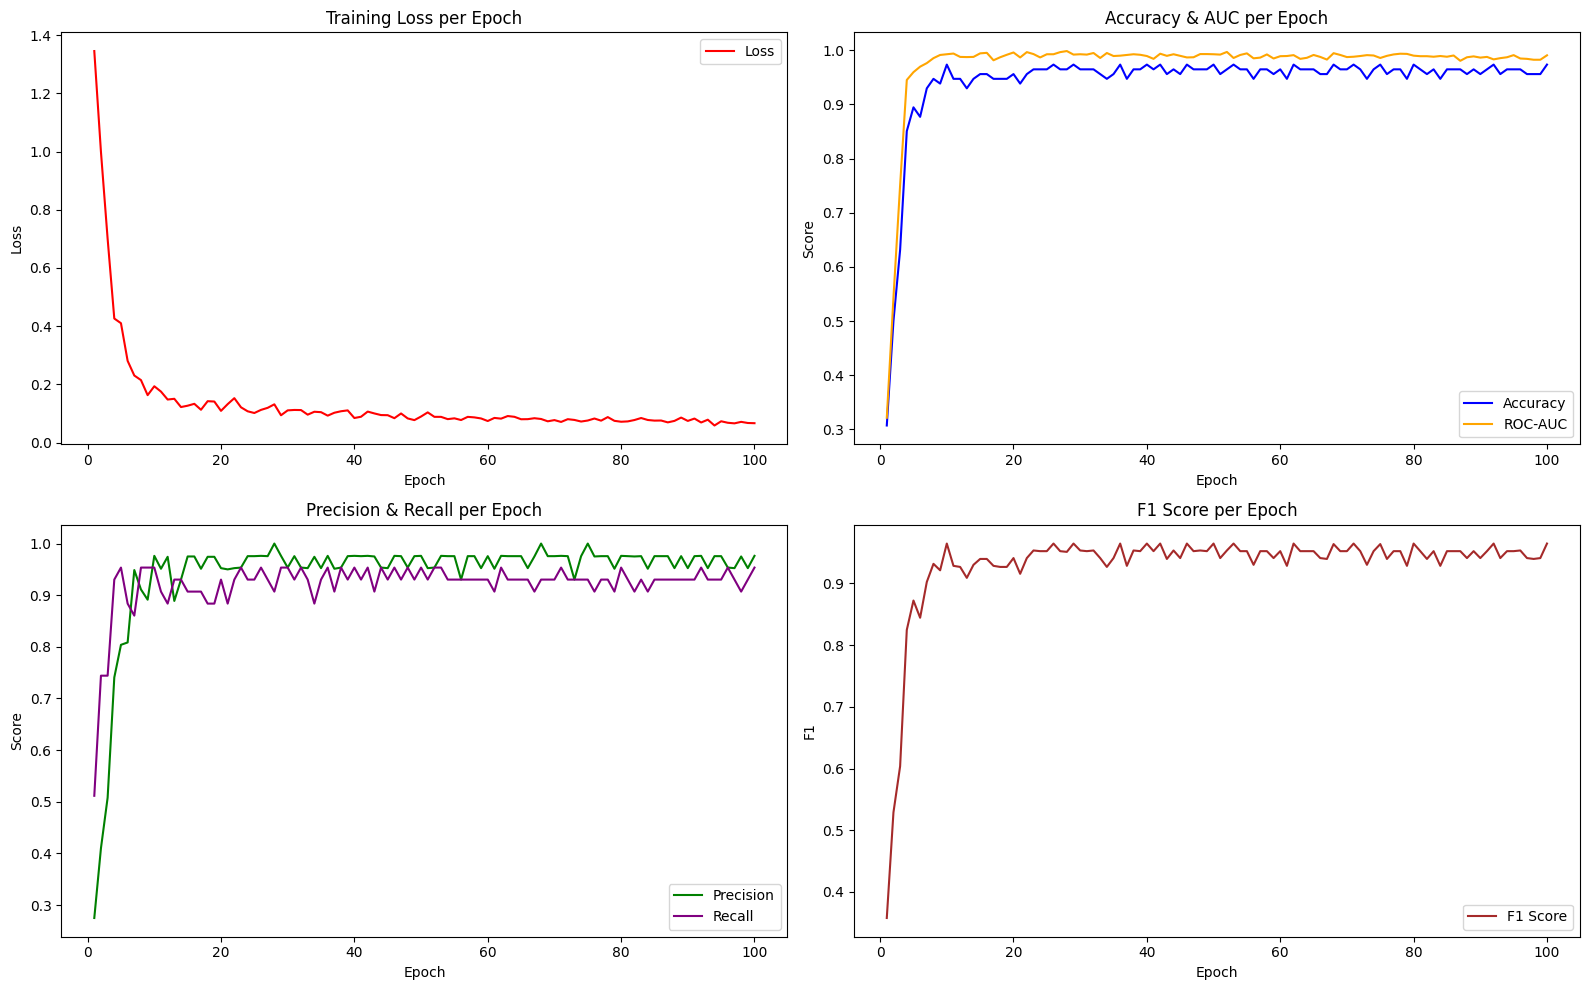

In [20]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# Define GCN Model
# -------------------------
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# -------------------------
# Initialize model
# -------------------------
model = GCN(in_channels=X.shape[1], hidden_channels=16, out_channels=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# -------------------------
# Track metrics
# -------------------------
epochs = 100
history = {"Epoch": [], "Loss": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": [], "ROC-AUC": []}

for epoch in range(epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        preds = out.argmax(dim=1)
        probs = out.exp()[:, 1]  # probability for class 1 (malignant)
        true = data.y
        if hasattr(data, "test_mask"):
            preds = preds[data.test_mask]
            probs = probs[data.test_mask]
            true = true[data.test_mask]

        acc = accuracy_score(true.cpu(), preds.cpu())
        prec = precision_score(true.cpu(), preds.cpu())
        rec = recall_score(true.cpu(), preds.cpu())
        f1 = f1_score(true.cpu(), preds.cpu())
        auc_val = roc_auc_score(true.cpu(), probs.cpu())

    # Save epoch results
    history["Epoch"].append(epoch + 1)
    history["Loss"].append(loss.item())
    history["Accuracy"].append(acc)
    history["Precision"].append(prec)
    history["Recall"].append(rec)
    history["F1"].append(f1)
    history["ROC-AUC"].append(auc_val)

# -------------------------
# Convert to DataFrame
# -------------------------
df_results = pd.DataFrame(history)
print("\n📊 Metrics per Epoch:\n")
print(df_results.head(10))  # print first 10 rows for preview

# Save full results to CSV (optional)
df_results.to_csv("gcn_wdbc_metrics.csv", index=False)



# -------------------------
# Plot Loss and Metrics
# -------------------------
plt.figure(figsize=(16,10))

# Loss curve
plt.subplot(2,2,1)
plt.plot(df_results["Epoch"], df_results["Loss"], label="Loss", color="red")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")
plt.legend()

# Accuracy + AUC
plt.subplot(2,2,2)
plt.plot(df_results["Epoch"], df_results["Accuracy"], label="Accuracy", color="blue")
plt.plot(df_results["Epoch"], df_results["ROC-AUC"], label="ROC-AUC", color="orange")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Accuracy & AUC per Epoch")
plt.legend()

# Precision & Recall
plt.subplot(2,2,3)
plt.plot(df_results["Epoch"], df_results["Precision"], label="Precision", color="green")
plt.plot(df_results["Epoch"], df_results["Recall"], label="Recall", color="purple")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Precision & Recall per Epoch")
plt.legend()

# F1 Score
plt.subplot(2,2,4)
plt.plot(df_results["Epoch"], df_results["F1"], label="F1 Score", color="brown")
plt.xlabel("Epoch")
plt.ylabel("F1")
plt.title("F1 Score per Epoch")
plt.legend()

plt.tight_layout()
plt.savefig("gcn_wdbc_metrics_plot.png", dpi=300) 

plt.show()


In [21]:
# -------------------------
# Convert to DataFrame
# -------------------------
df_results = pd.DataFrame(history)
print("\n📊 Metrics per Epoch:\n")
print(df_results.head(10))  # print first 10 rows for preview

# Save full results to CSV (optional)
df_results.to_csv("gcn_wdbc_metrics.csv", index=False)


📊 Metrics per Epoch:

   Epoch      Loss  Accuracy  Precision    Recall        F1   ROC-AUC
0      1  1.345578  0.307018   0.275000  0.511628  0.357724  0.321323
1      2  0.998786  0.500000   0.410256  0.744186  0.528926  0.543400
2      3  0.700311  0.631579   0.507937  0.744186  0.603774  0.751065
3      4  0.426258  0.850877   0.740741  0.930233  0.824742  0.945300
4      5  0.410173  0.894737   0.803922  0.953488  0.872340  0.959712
5      6  0.280804  0.877193   0.808511  0.883721  0.844444  0.969866
6      7  0.230402  0.929825   0.948718  0.860465  0.902439  0.976417
7      8  0.214672  0.947368   0.911111  0.953488  0.931818  0.985588
8      9  0.162927  0.938596   0.891304  0.953488  0.921348  0.991484
9     10  0.193467  0.973684   0.976190  0.953488  0.964706  0.992794


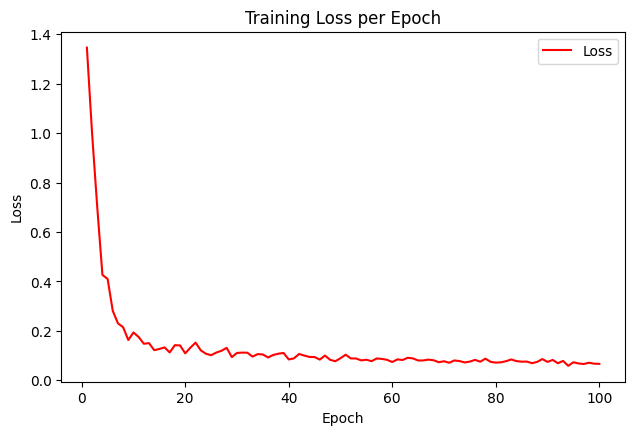

In [22]:
# -------------------------
# Plot Loss and Metrics
# -------------------------
plt.figure(figsize=(16,10))

# Loss curve
plt.subplot(2,2,1)
plt.plot(df_results["Epoch"], df_results["Loss"], label="Loss", color="red")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")
plt.legend()


plt.show()

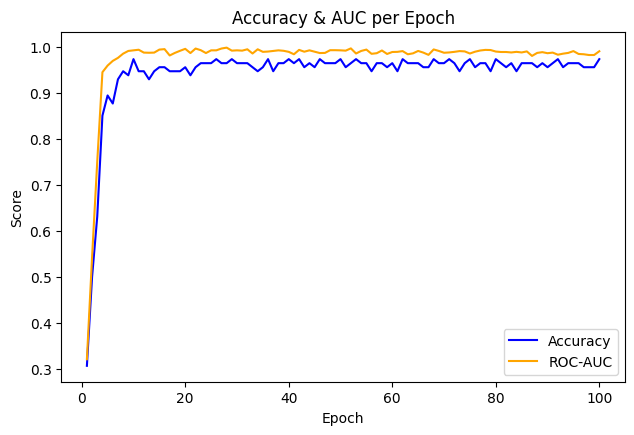

In [23]:

# Accuracy + AUC
plt.figure(figsize=(16,10))
plt.subplot(2,2,2)
plt.plot(df_results["Epoch"], df_results["Accuracy"], label="Accuracy", color="blue")
plt.plot(df_results["Epoch"], df_results["ROC-AUC"], label="ROC-AUC", color="orange")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Accuracy & AUC per Epoch")
plt.legend()



plt.show()

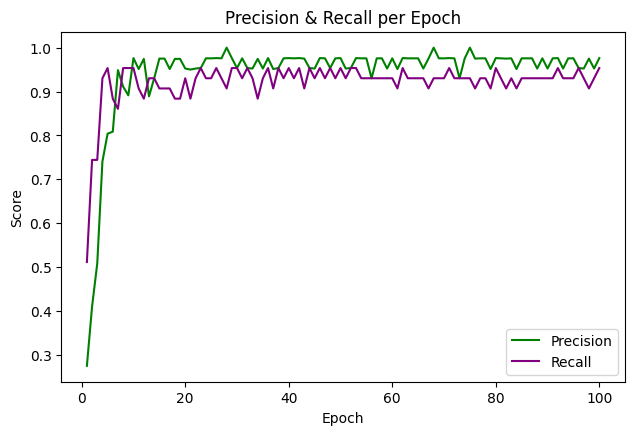

In [24]:
plt.figure(figsize=(16,10))
# Precision & Recall
plt.subplot(2,2,3)
plt.plot(df_results["Epoch"], df_results["Precision"], label="Precision", color="green")
plt.plot(df_results["Epoch"], df_results["Recall"], label="Recall", color="purple")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Precision & Recall per Epoch")
plt.legend()

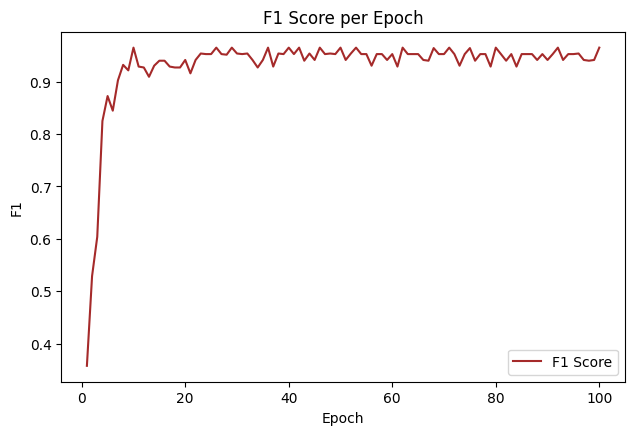

In [25]:
# F1 Score
plt.figure(figsize=(16,10))
plt.subplot(2,2,4)
plt.plot(df_results["Epoch"], df_results["F1"], label="F1 Score", color="brown")
plt.xlabel("Epoch")
plt.ylabel("F1")
plt.title("F1 Score per Epoch")
plt.legend()

In [26]:
import os
print(os.getcwd())


/kaggle/working


In [27]:
!ls -lh /kaggle/working




total 904K
-rw-r--r-- 1 root root  12K Oct  8 10:52 gcn_wdbc_metrics.csv
-rw-r--r-- 1 root root 477K Oct  8 10:52 gcn_wdbc_metrics_plot.png
---------- 1 root root 409K Oct  8 10:52 __notebook__.ipynb


In [28]:
from IPython.display import FileLink, display

display(FileLink("/kaggle/working/gcn_wdbc_metrics_plot.png"))
#display(FileLink("/kaggle/working/loss_curve.png"))

/kaggle/working/gcn_wdbc_metrics_plot.png

# confusion matrics 

Epoch 01: Loss=1.5946, Precision=0.1667, Recall=0.0233, F1=0.0408, AUC=0.3570
Epoch 02: Loss=1.0757, Precision=0.4000, Recall=0.0465, F1=0.0833, AUC=0.5450
Epoch 03: Loss=0.6692, Precision=0.9286, Recall=0.3023, F1=0.4561, AUC=0.7317
Epoch 04: Loss=0.5237, Precision=0.8387, Recall=0.6047, F1=0.7027, AUC=0.8552
Epoch 05: Loss=0.3235, Precision=0.9706, Recall=0.7674, F1=0.8571, AUC=0.9545
Epoch 06: Loss=0.2854, Precision=0.8750, Recall=0.8140, F1=0.8434, AUC=0.9656
Epoch 07: Loss=0.2394, Precision=0.9250, Recall=0.8605, F1=0.8916, AUC=0.9797
Epoch 08: Loss=0.2643, Precision=0.9756, Recall=0.9302, F1=0.9524, AUC=0.9794
Epoch 09: Loss=0.2052, Precision=0.9302, Recall=0.9302, F1=0.9302, AUC=0.9817
Epoch 10: Loss=0.1941, Precision=0.9500, Recall=0.8837, F1=0.9157, AUC=0.9879
Epoch 11: Loss=0.1924, Precision=0.9091, Recall=0.9302, F1=0.9195, AUC=0.9826
Epoch 12: Loss=0.1576, Precision=0.9756, Recall=0.9302, F1=0.9524, AUC=0.9902
Epoch 13: Loss=0.1574, Precision=0.9348, Recall=1.0000, F1=0.966

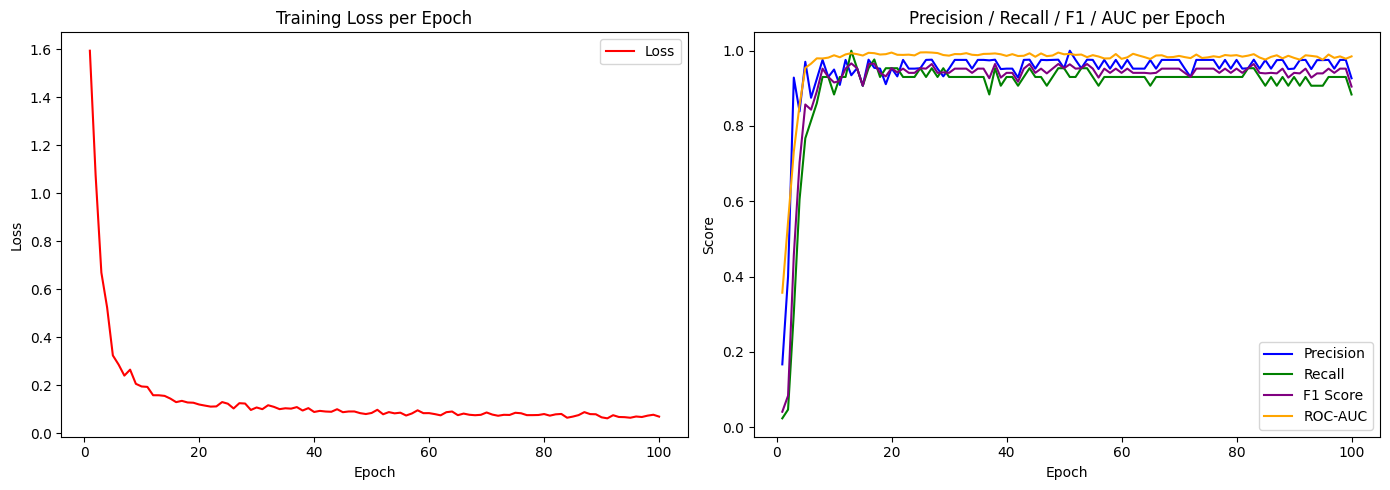

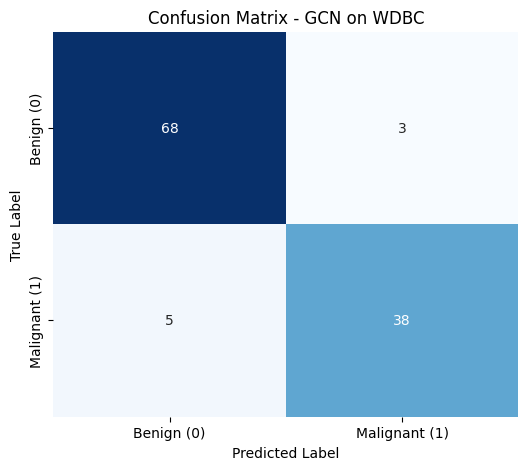

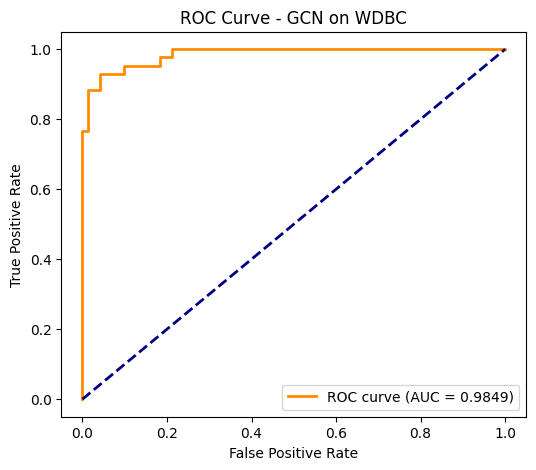

In [29]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# Define GCN Model
# -------------------------
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# -------------------------
# Initialize model
# -------------------------
model = GCN(in_channels=X.shape[1], hidden_channels=16, out_channels=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# -------------------------
# Track metrics
# -------------------------
epochs = 100
train_losses, precisions, recalls, f1s, aucs = [], [], [], [], []

for epoch in range(epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Evaluation each epoch
    model.eval()
    with torch.no_grad():
        preds = out.argmax(dim=1)
        probs = out.exp()[:, 1]  # probability for class 1 (malignant)
        true = data.y
        if hasattr(data, "test_mask"):
            preds = preds[data.test_mask]
            probs = probs[data.test_mask]
            true = true[data.test_mask]

        precisions.append(precision_score(true.cpu(), preds.cpu()))
        recalls.append(recall_score(true.cpu(), preds.cpu()))
        f1s.append(f1_score(true.cpu(), preds.cpu()))
        aucs.append(roc_auc_score(true.cpu(), probs.cpu()))

    # Print epoch summary
    print(f"Epoch {epoch+1:02d}: Loss={loss.item():.4f}, "
          f"Precision={precisions[-1]:.4f}, Recall={recalls[-1]:.4f}, "
          f"F1={f1s[-1]:.4f}, AUC={aucs[-1]:.4f}")

# -------------------------
# Final Evaluation
# -------------------------
acc = accuracy_score(true.cpu(), preds.cpu())
prec = precision_score(true.cpu(), preds.cpu())
rec = recall_score(true.cpu(), preds.cpu())
f1 = f1_score(true.cpu(), preds.cpu())
auc_val = roc_auc_score(true.cpu(), probs.cpu())
cm = confusion_matrix(true.cpu(), preds.cpu())

print("\nFinal Metrics")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("ROC-AUC:", auc_val)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(true.cpu(), preds.cpu()))

# -------------------------
# Plot Loss and Metrics
# -------------------------
plt.figure(figsize=(14,5))

# Loss curve
plt.subplot(1,2,1)
plt.plot(range(1, epochs+1), train_losses, label="Loss", color="red")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")
plt.legend()

# Precision, Recall, F1, AUC curve
plt.subplot(1,2,2)
plt.plot(range(1, epochs+1), precisions, label="Precision", color="blue")
plt.plot(range(1, epochs+1), recalls, label="Recall", color="green")
plt.plot(range(1, epochs+1), f1s, label="F1 Score", color="purple")
plt.plot(range(1, epochs+1), aucs, label="ROC-AUC", color="orange")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Precision / Recall / F1 / AUC per Epoch")
plt.legend()

plt.tight_layout()
plt.show()

# -------------------------
# Confusion Matrix Heatmap
# -------------------------
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Benign (0)", "Malignant (1)"],
            yticklabels=["Benign (0)", "Malignant (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - GCN on WDBC")
plt.show()

# -------------------------
# ROC Curve
# -------------------------
fpr, tpr, _ = roc_curve(true.cpu(), probs.cpu())
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {auc_val:.4f})")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - GCN on WDBC")
plt.legend(loc="lower right")
plt.show()


In [30]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

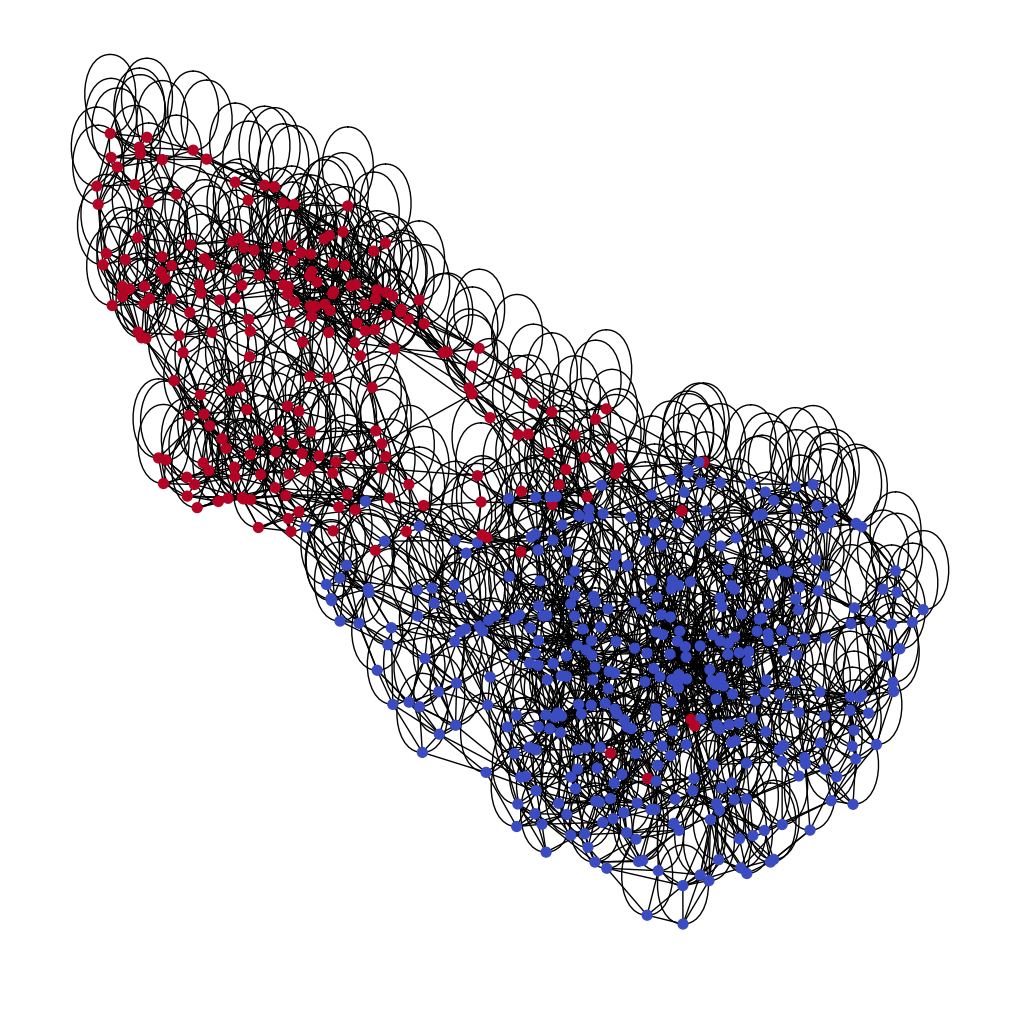

In [31]:

# Convert PyTorch Geometric data to NetworkX graph
G = to_networkx(data, to_undirected=True)

# Draw the graph
plt.figure(figsize=(10, 10))

pos = nx.spring_layout(G, seed=42)  # Position nodes using spring layout
nx.draw(G, pos, node_color=data.y, cmap='coolwarm', node_size=50, with_labels=False)

plt.show()

# compare optimizers

In [32]:
X = torch.tensor(X_scaled, dtype=torch.float)
y = torch.tensor(y, dtype=torch.long)
edge_index = torch.tensor(edge_index, dtype=torch.long)

/tmp/ipykernel_13/2131709456.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.long)
/tmp/ipykernel_13/2131709456.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_index = torch.tensor(edge_index, dtype=torch.long)


In [33]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout=0.5):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.dropout = dropout

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

def train(model, optimizer, data, train_idx, val_idx):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.nll_loss(out[train_idx], data.y[train_idx])
    loss.backward()
    optimizer.step()
    return loss.item()

def evaluate(model, data, idx):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        pred = out[idx].max(1)[1]
    y_true = data.y[idx].cpu().numpy()
    y_pred = pred.cpu().numpy()
    probs = torch.exp(out[idx])[:, 1].cpu().numpy()

    return {
        "acc": accuracy_score(y_true, y_pred),
        "prec": precision_score(y_true, y_pred),
        "rec": recall_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred),
        "roc": roc_auc_score(y_true, probs)
    }
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}
optimizers = {
    "SGD": lambda params: torch.optim.SGD(params, lr=0.01, momentum=0.9),
    "Adam": lambda params: torch.optim.Adam(params, lr=0.01, weight_decay=5e-4),
    "AdamW": lambda params: torch.optim.AdamW(params, lr=0.01, weight_decay=5e-4),
    "RMSProp": lambda params: torch.optim.RMSprop(params, lr=0.01)
}

for opt_name, opt_fn in optimizers.items():
    fold_scores = []
    for train_idx, val_idx in kf.split(X):
        data = Data(x=X, edge_index=edge_index, y=y)

        model = GCN(in_channels=X.shape[1], hidden_channels=16, out_channels=2)
        optimizer = opt_fn(model.parameters())

        # Training loop
        for epoch in range(50):  # you can increase to 200
            loss = train(model, optimizer, data, torch.tensor(train_idx), torch.tensor(val_idx))

        scores = evaluate(model, data, torch.tensor(val_idx))
        fold_scores.append(scores)

    # Average results
    avg_scores = {m: np.mean([fs[m] for fs in fold_scores]) for m in fold_scores[0]}
    results[opt_name] = avg_scores


print("\nOptimizer Comparison Results:")
for opt, res in results.items():
    print(f"{opt:7s} -> Acc: {res['acc']:.4f}, Prec: {res['prec']:.4f}, "
          f"Rec: {res['rec']:.4f}, F1: {res['f1']:.4f}, ROC-AUC: {res['roc']:.4f}")




Optimizer Comparison Results:
SGD     -> Acc: 0.9596, Prec: 0.9607, Rec: 0.9289, F1: 0.9445, ROC-AUC: 0.9902
Adam    -> Acc: 0.9631, Prec: 0.9533, Rec: 0.9494, F1: 0.9510, ROC-AUC: 0.9916
AdamW   -> Acc: 0.9596, Prec: 0.9522, Rec: 0.9407, F1: 0.9459, ROC-AUC: 0.9905
RMSProp -> Acc: 0.9631, Prec: 0.9569, Rec: 0.9454, F1: 0.9505, ROC-AUC: 0.9889


# 5-fold cross-validation (compare hyperparameter)

In [34]:
import itertools
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import pandas as pd

# -------------------------------
# Define GCN model dynamically
# -------------------------------
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, layers, dropout):
        super().__init__()
        self.convs = torch.nn.ModuleList()
        if layers == 1:
            self.convs.append(GCNConv(in_channels, out_channels))
        else:
            self.convs.append(GCNConv(in_channels, hidden_channels))
            for _ in range(layers-2):
                self.convs.append(GCNConv(hidden_channels, hidden_channels))
            self.convs.append(GCNConv(hidden_channels, out_channels))
        self.dropout = dropout

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        for conv in self.convs[:-1]:
            x = conv(x, edge_index)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.convs[-1](x, edge_index)
        return F.log_softmax(x, dim=1)

# -------------------------------
# Hyperparameter grid
# -------------------------------
param_grid = {
    "hidden_channels": [8, 16, 32],
    "dropout": [0.0, 0.3, 0.5],
    "lr": [0.01, 0.001],
    "layers": [1, 2, 3, 4]
}

experiments = list(itertools.product(
    param_grid["hidden_channels"],
    param_grid["dropout"],
    param_grid["lr"],
    param_grid["layers"]
))

results = []

# -------------------------------
# K-fold cross validation
# -------------------------------
y = data.y.cpu().numpy()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for hidden, dropout, lr, layers in experiments:
    acc_scores, loss_scores = [], []

    for train_idx, test_idx in skf.split(torch.arange(len(y)), y):
        train_idx = torch.tensor(train_idx, dtype=torch.long)
        test_idx = torch.tensor(test_idx, dtype=torch.long)

        # Boolean masks
        train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
        test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
        train_mask[train_idx] = True
        test_mask[test_idx] = True

        data.train_mask = train_mask
        data.test_mask = test_mask

        # Build model
        model = GCN(data.num_node_features, hidden, 2, layers, dropout)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)

        # Training loop
        for epoch in range(30):
            model.train()
            optimizer.zero_grad()
            out = model(data)
            loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
            loss.backward()
            optimizer.step()

        # Evaluation
        model.eval()
        preds = out.argmax(dim=1)
        acc = accuracy_score(data.y[data.test_mask].cpu(), preds[data.test_mask].cpu())

        acc_scores.append(acc)
        loss_scores.append(loss.item())

    # Average across folds
    results.append({
        "hidden_channels": hidden,
        "dropout": dropout,
        "learning_rate": lr,
        "layers": layers,
        "mean_accuracy": sum(acc_scores)/len(acc_scores),
        "mean_loss": sum(loss_scores)/len(loss_scores)
    })

# -------------------------------
# Results summary
# -------------------------------
df = pd.DataFrame(results)
df_sorted = df.sort_values("mean_accuracy", ascending=False).reset_index(drop=True)

print("\nAll Hyperparameter Combinations (with 5-fold CV):")
print(df_sorted.to_string(index=False))


All Hyperparameter Combinations (with 5-fold CV):
 hidden_channels  dropout  learning_rate  layers  mean_accuracy  mean_loss
              16      0.0          0.010       3       0.968421   0.086025
               8      0.0          0.010       1       0.968390   0.108492
              16      0.0          0.010       2       0.966667   0.084036
              16      0.3          0.010       1       0.966651   0.111749
              32      0.0          0.010       2       0.966651   0.078082
              32      0.0          0.010       1       0.966620   0.112215
              16      0.5          0.010       2       0.964897   0.100860
              16      0.0          0.010       1       0.964881   0.103936
              16      0.3          0.010       3       0.963142   0.115124
              32      0.0          0.010       3       0.963127   0.067194
              32      0.3          0.010       2       0.963127   0.079337
              32      0.3          0.010       1 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

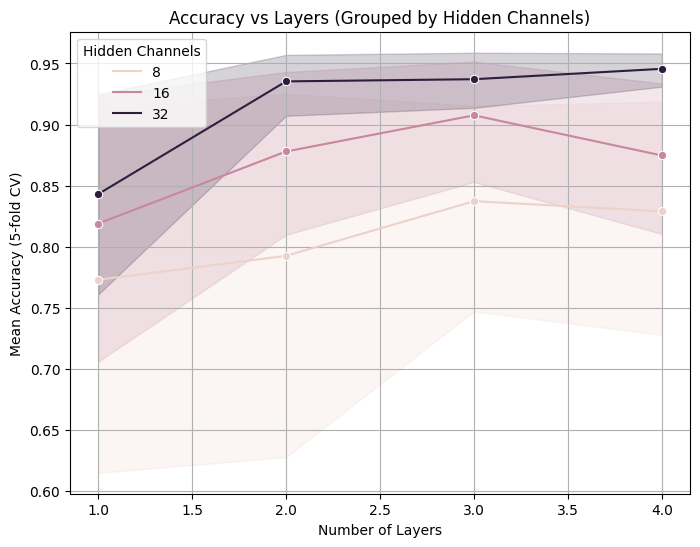

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Accuracy vs Layers grouped by Hidden Channels
# -------------------------------
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x="layers", y="mean_accuracy", hue="hidden_channels", marker="o")
plt.title("Accuracy vs Layers (Grouped by Hidden Channels)")
plt.xlabel("Number of Layers")
plt.ylabel("Mean Accuracy (5-fold CV)")
plt.legend(title="Hidden Channels")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

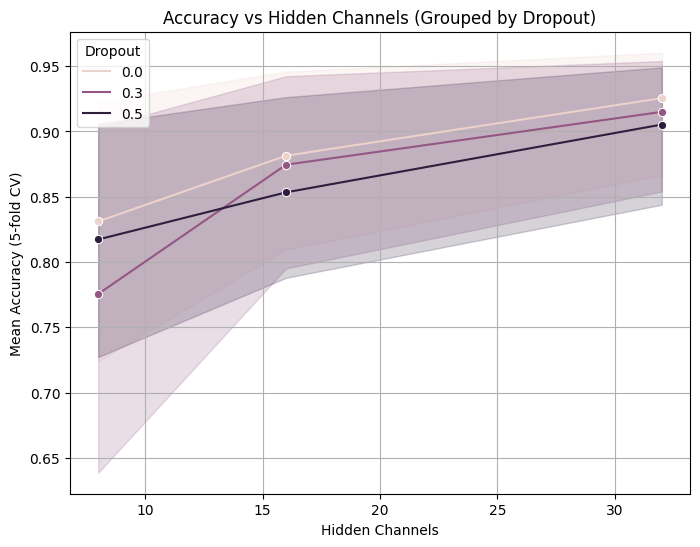

In [36]:
# 2. Accuracy vs Hidden Channels grouped by Dropout
# -------------------------------
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x="hidden_channels", y="mean_accuracy", hue="dropout", marker="o")
plt.title("Accuracy vs Hidden Channels (Grouped by Dropout)")
plt.xlabel("Hidden Channels")
plt.ylabel("Mean Accuracy (5-fold CV)")
plt.legend(title="Dropout")
plt.grid(True)
plt.show()


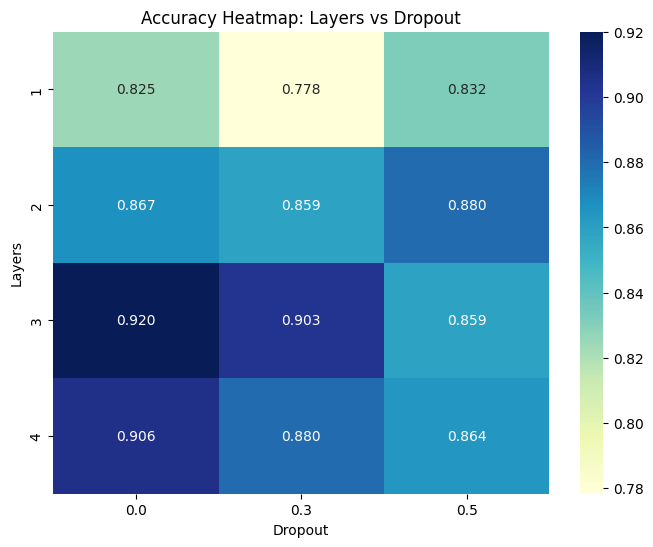

In [37]:
# 3. Heatmap: Layers × Dropout
# -------------------------------
pivot_table = df.pivot_table(values="mean_accuracy", index="layers", columns="dropout")
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Accuracy Heatmap: Layers vs Dropout")
plt.ylabel("Layers")
plt.xlabel("Dropout")
plt.show()

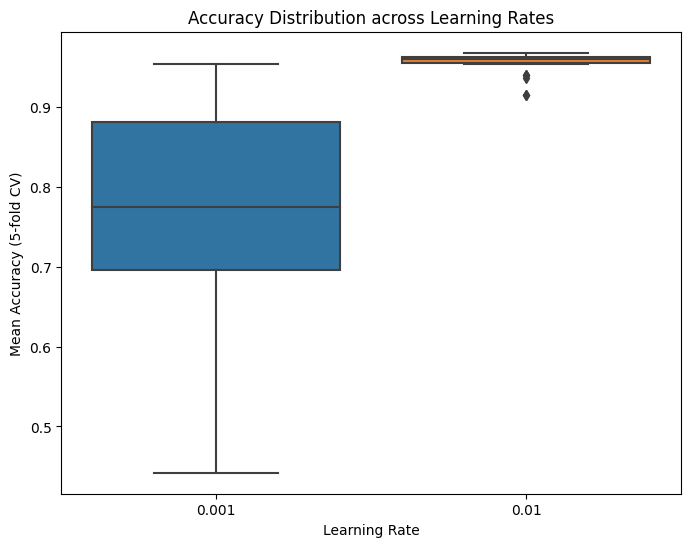

In [38]:
# 4. Accuracy Distribution across Learning Rates
# -------------------------------
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="learning_rate", y="mean_accuracy")
plt.title("Accuracy Distribution across Learning Rates")
plt.xlabel("Learning Rate")
plt.ylabel("Mean Accuracy (5-fold CV)")
plt.show()


In [39]:
# Fix the number of layers, e.g., layers = 3
fixed_layers = 3

# Filter dataframe for the fixed number of layers
df_fixed_layers = df_sorted[df_sorted["layers"] == fixed_layers]

# Sort by mean_accuracy
df_fixed_layers = df_fixed_layers.sort_values("mean_accuracy", ascending=False).reset_index(drop=True)

# Print the table
print(f"\nHyperparameter Comparison for {fixed_layers} Layers:")
print(df_fixed_layers[["hidden_channels", "dropout", "learning_rate", "mean_accuracy", "mean_loss"]].to_string(index=False))


Hyperparameter Comparison for 3 Layers:
 hidden_channels  dropout  learning_rate  mean_accuracy  mean_loss
              16      0.0          0.010       0.968421   0.086025
              16      0.3          0.010       0.963142   0.115124
              32      0.0          0.010       0.963127   0.067194
              32      0.5          0.010       0.961372   0.103557
               8      0.0          0.010       0.956109   0.101675
              32      0.3          0.010       0.956078   0.088891
              32      0.0          0.001       0.945583   0.209818
              16      0.5          0.010       0.940320   0.122643
               8      0.3          0.010       0.936827   0.128327
               8      0.5          0.010       0.915696   0.181410
              32      0.3          0.001       0.906878   0.241496
              16      0.3          0.001       0.905201   0.318520
              32      0.5          0.001       0.889365   0.327981
              16     

In [40]:
# Fix the number of layers, e.g., layers = 3
fixed_layers = 2

# Filter dataframe for the fixed number of layers
df_fixed_layers = df_sorted[df_sorted["layers"] == fixed_layers]

# Sort by mean_accuracy
df_fixed_layers = df_fixed_layers.sort_values("mean_accuracy", ascending=False).reset_index(drop=True)

# Print the table
print(f"\nHyperparameter Comparison for {fixed_layers} Layers:")
print(df_fixed_layers[["hidden_channels", "dropout", "learning_rate", "mean_accuracy", "mean_loss"]].to_string(index=False))


Hyperparameter Comparison for 2 Layers:
 hidden_channels  dropout  learning_rate  mean_accuracy  mean_loss
              16      0.0          0.010       0.966667   0.084036
              32      0.0          0.010       0.966651   0.078082
              16      0.5          0.010       0.964897   0.100860
              32      0.3          0.010       0.963127   0.079337
              32      0.5          0.010       0.961388   0.094118
               8      0.3          0.010       0.961372   0.123627
              16      0.3          0.010       0.957848   0.093061
               8      0.0          0.010       0.956140   0.098002
               8      0.5          0.010       0.954339   0.128985
              32      0.0          0.001       0.922683   0.241592
              32      0.3          0.001       0.919205   0.259665
              32      0.5          0.001       0.878668   0.331781
              16      0.0          0.001       0.833116   0.390612
              16     

In [41]:
# Fix the number of layers, e.g., layers = 1
fixed_layers = 1

# Filter dataframe for the fixed number of layers
df_fixed_layers = df_sorted[df_sorted["layers"] == fixed_layers]

# Sort by mean_accuracy
df_fixed_layers = df_fixed_layers.sort_values("mean_accuracy", ascending=False).reset_index(drop=True)

# Print the table
print(f"\nHyperparameter Comparison for {fixed_layers} Layers:")
print(df_fixed_layers[["hidden_channels", "dropout", "learning_rate", "mean_accuracy", "mean_loss"]].to_string(index=False))


Hyperparameter Comparison for 1 Layers:
 hidden_channels  dropout  learning_rate  mean_accuracy  mean_loss
               8      0.0          0.010       0.968390   0.108492
              16      0.3          0.010       0.966651   0.111749
              32      0.0          0.010       0.966620   0.112215
              16      0.0          0.010       0.964881   0.103936
              32      0.3          0.010       0.963111   0.108556
               8      0.5          0.010       0.963111   0.097733
              16      0.5          0.010       0.961357   0.113183
              32      0.5          0.010       0.959618   0.124512
               8      0.3          0.010       0.954339   0.132165
              32      0.0          0.001       0.728831   0.653567
              32      0.5          0.001       0.721705   0.579813
              16      0.5          0.001       0.718988   0.639815
              32      0.3          0.001       0.718506   0.567220
              16     